<a href="https://colab.research.google.com/github/Shraeyshth/Google-colab/blob/main/ML_Predictive_Analytics_for_Business_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries if not already present
!pip install seaborn

In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

In [3]:
# Load dataset from URL
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'
data = pd.read_csv(url)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


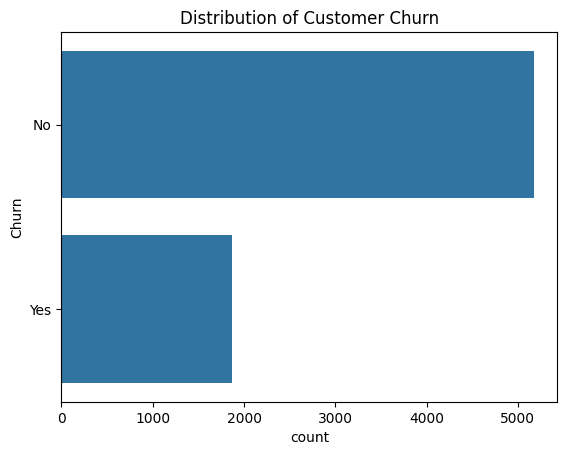

In [4]:
# Display the first few rows of the dataset
data.head()

# Check the basic information of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Check the distribution of the target variable (Churn)
sns.countplot(data['Churn'])
plt.title('Distribution of Customer Churn')
plt.show()

In [5]:
# Drop irrelevant columns (like customerID)
data.drop(['customerID'], axis=1, inplace=True)

# Handling missing values in the 'TotalCharges' column
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Convert 'Churn' column to binary (Yes = 1, No = 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separating features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-5-abc6df6c5ec3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [6]:
# Build the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Accuracy: 79.35%


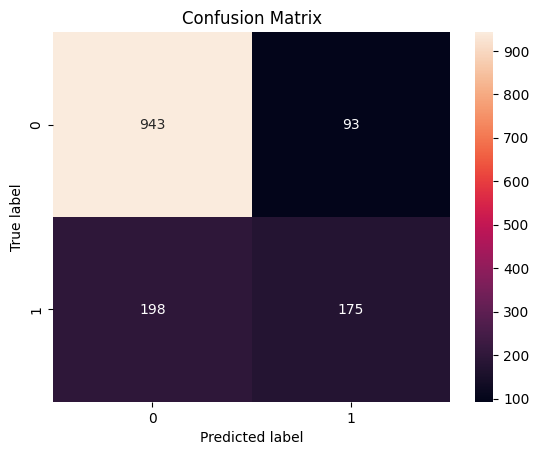

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [7]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

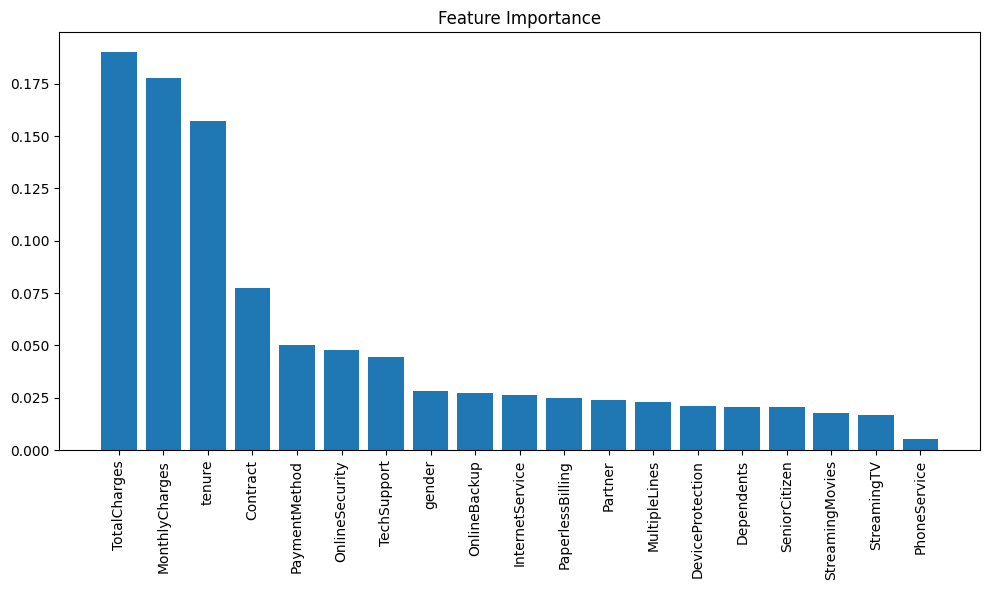

In [8]:
# Feature importance plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [9]:
import joblib
# Save the model
joblib.dump(model, 'churn_prediction_model.pkl')

# To download the model locally
files.download('churn_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Example input data (replace with actual customer data)
new_customer_data = [[1, 0, 0, 0, 1, 1, 5, 0, 1, 0, 0, 0, 1, 1, 50, 0, 0, 1, 7]]  # Input format should match your model

# Standardize the new data before making predictions
new_data_scaled = scaler.transform(new_customer_data)

# Make a prediction
prediction = model.predict(new_data_scaled)
print(f'Prediction: {"Churn" if prediction[0] == 1 else "No Churn"}')

Prediction: No Churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
